In [1]:
import pandas as pd
import tarfile
from multiprocessing import Pool
from tqdm import tqdm

In [2]:
p = Pool(16)

In [3]:
meta_df = pd.read_csv('../DMS_substitutions.csv')
studies = meta_df['DMS_filename'].map(lambda x: f'../studies/{x}')

all_studies_df = list(tqdm(p.imap(pd.read_csv, studies), total=len(studies)))

  0%|          | 0/217 [00:00<?, ?it/s]

100%|██████████| 217/217 [00:05<00:00, 42.85it/s]


In [4]:
def get_max_number_of_mutations(df):
    # count the occurences of a : in the column mutant
    return df['mutant'].str.count(':').max() + 1

In [6]:
all_studies_max_mutations = list(tqdm(p.imap(get_max_number_of_mutations, all_studies_df, chunksize=1), total=len(all_studies_df)))

100%|██████████| 217/217 [00:02<00:00, 76.11it/s] 


In [7]:
# print mean, median, max
print(f'Mean: {pd.Series(all_studies_max_mutations).mean()}')
print(f'Median: {pd.Series(all_studies_max_mutations).median()}')
print(f'Max: {pd.Series(all_studies_max_mutations).max()}')

Mean: 2.262672811059908
Median: 1.0
Max: 44


In [8]:
# get argmax of max mutations
argmax = pd.Series(all_studies_max_mutations).idxmax()
print(f'Argmax: {argmax}')
print(f'Study Name of Argmax: {meta_df.iloc[argmax]["DMS_filename"]}')

Argmax: 65
Study Name of Argmax: GCN4_YEAST_Staller_2018.csv


In [9]:
# append the max number of mutations to the meta_df
meta_df['max_mutations'] = all_studies_max_mutations

In [10]:
# print head of df sorted by max_mutations
meta_df.sort_values('max_mutations', ascending=False).head(10)

,DMS_id,DMS_filename,UniProt_ID,taxon,source_organism,target_seq,seq_len,includes_multiple_mutants,DMS_total_number_mutants,DMS_number_single_mutants,...,raw_DMS_filename,raw_DMS_phenotype_name,raw_DMS_directionality,raw_DMS_mutant_column,weight_file_name,pdb_file,ProteinGym_version,raw_mut_offset,coarse_selection_type,max_mutations
65,GCN4_YEAST_Staller_2018,GCN4_YEAST_Staller_2018.csv,GCN4_YEAST,Eukaryote,Saccharomyces cerevisiae,MSEYQPSLFALNPMGFSPLDGSKSTNENVSASTSTAKPMVGQLIFD...,281,True,2638,33,...,GCN4_YEAST_Staller_2018.csv,Induction,1,mutant,GCN4_YEAST_theta_0.2.npy,GCN4_YEAST.pdb,0.1,NaN,Binding,44
146,Q8WTC7_9CNID_Somermeyer_2022,Q8WTC7_9CNID_Somermeyer_2022.csv,Q8WTC7_9CNID,Eukaryote,Aequorea macrodactyla,MSKGEELFTGIVPVLIELDGDVHGHKFSVRGEGEGDADYGKLEIKF...,238,True,33510,1201,...,Q8WTC8_9CNID_Somermeyer_2022.csv,replicates_mean_brightness,1,mutant,Q8WTC7_9CNID_theta_0.2.npy,Q8WTC7_9CNID.pdb,1.0,NaN,Activity,43
28,CAPSD_AAV2S_Sinai_2021,CAPSD_AAV2S_Sinai_2021.csv,CAPSD_AAV2S,Virus,Adeno-associated virus 2,MAADGYLPDWLEDTLSEGIRQWWKLKPGPPPPKPAERHKDDSRGLV...,735,True,42328,532,...,CAPSD_AAV2S_Sinai_substitutions_2021.csv,viral_selection,1,mutant,CAPSD_AAV2S_theta_0.01.npy,CAPSD_AAV2S.pdb,0.1,NaN,OrganismalFitness,28
73,HIS7_YEAST_Pokusaeva_2019,HIS7_YEAST_Pokusaeva_2019.csv,HIS7_YEAST,Eukaryote,Saccharomyces cerevisiae,MTEQKALVKRITNETKIQIAISLKGGPLAIEHSIFPEKEAEAVAEQ...,220,True,496137,168,...,HIS7_YEAST_Pokusaeva_2019.csv,selection,1,mutant,HIS7_YEAST_theta_0.2.npy,HIS7_YEAST.pdb,0.1,NaN,OrganismalFitness,28
46,D7PM05_CLYGR_Somermeyer_2022,D7PM05_CLYGR_Somermeyer_2022.csv,D7PM05_CLYGR,Eukaryote,Clytia gregaria,MTALTEGAKLFEKEIPYITELEGDVEGMKFIIKGEGTGDATTGTIK...,235,True,24515,1169,...,D7PM05_CLYGR_Somermeyer_2022.csv,replicates_mean_brightness,1,mutant,D7PM05_CLYGR_theta_0.2.npy,D7PM05_CLYGR.pdb,1.0,NaN,Activity,23
67,GFP_AEQVI_Sarkisyan_2016,GFP_AEQVI_Sarkisyan_2016.csv,GFP_AEQVI,Eukaryote,Aequorea victoria,MSKGEELFTGVVPILVELDGDVNGHKFSVSGEGEGDATYGKLTLKF...,238,True,51714,1084,...,GFP_AEQVI_Sarkisyan_2016.csv,mean_medianBrightness_per_aaseq,1,mutant,GFP_AEQVI_theta_0.2.npy,GFP_AEQVI.pdb,0.1,NaN,Activity,15
124,PHOT_CHLRE_Chen_2023,PHOT_CHLRE_Chen_2023.csv,PHOT_CHLRE,Eukaryote,Chlamydomonas reinhardtii,AGLRHTFVVADATLPDCPLVYASEGFYAMTGYGPDEVLGHNARFLQ...,118,True,167529,2122,...,sb2c00662_si_001.xlsx,mean,1,mutant,PHOT_CHLRE_theta0.2_2023-08-07_b02.npy,PHOT_CHLRE.pdb,1.0,NaN,Activity,15
143,Q6WV13_9MAXI_Somermeyer_2022,Q6WV13_9MAXI_Somermeyer_2022.csv,Q6WV12_9MAXI,Eukaryote,Pontellina plumata,MPAMKIECRITGTLNGVEFELVGGGEGTPEQGRMTNKMKSTKGALT...,222,True,31401,1141,...,Q6WV13_9MAXI_Somermeyer_2022.csv,replicates_mean_brightness,1,mutant,Q6WV12_9MAXI_theta_0.2.npy,Q6WV12_9MAXI.pdb,1.0,NaN,Activity,13
60,F7YBW7_MESOW_Ding_2023,F7YBW7_MESOW_Ding_2023.csv,F7YBW7_MESOW,Prokaryote,M. opportunism,MANVEKMSVAVTPQQAAVMREAVEAGEYATASEIVREAVRDWLAKR...,93,True,7922,80,...,df_at_10pos.csv,DMS_score,1,mutant,F7YBW8_MESOW_theta_0.2.npy,F7YBW7_MESOW.pdb,1.0,NaN,OrganismalFitness,10
61,F7YBW8_MESOW_Aakre_2015,F7YBW8_MESOW_Aakre_2015.csv,F7YBW8_MESOW,Prokaryote,Mesorhizobium opportunistum (strain LMG 24607 ...,MANVEKMSVAVTPQQAAVMREAVEAGEYATASEIVREAVRDWLAKR...,93,True,9192,37,...,F7YBW8_MESOW_Aakre_2015.csv,fitness,1,mutant,F7YBW8_MESOW_theta_0.2.npy,F7YBW8_MESOW.pdb,0.1,NaN,OrganismalFitness,4


# Winner
The study `GCN4_YEAST_Staller_2018` has both a fantastic length and not too many data points in the study.

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
# take top 10 studies and make histogram of the number of mutations in a 2x5 grid
top_10 = meta_df.sort_values('max_mutations', ascending=False).head(10)
top_10_studies = top_10['DMS_filename'].map(lambda x: f'../studies/{x}')
top_10_df = list(tqdm(p.imap(pd.read_csv, top_10_studies), total=len(top_10_studies)))

100%|██████████| 10/10 [00:02<00:00,  3.93it/s]


In [15]:
print("\n".join(top_10['DMS_id']))

GCN4_YEAST_Staller_2018
Q8WTC7_9CNID_Somermeyer_2022
CAPSD_AAV2S_Sinai_2021
HIS7_YEAST_Pokusaeva_2019
D7PM05_CLYGR_Somermeyer_2022
GFP_AEQVI_Sarkisyan_2016
PHOT_CHLRE_Chen_2023
Q6WV13_9MAXI_Somermeyer_2022
F7YBW7_MESOW_Ding_2023
F7YBW8_MESOW_Aakre_2015


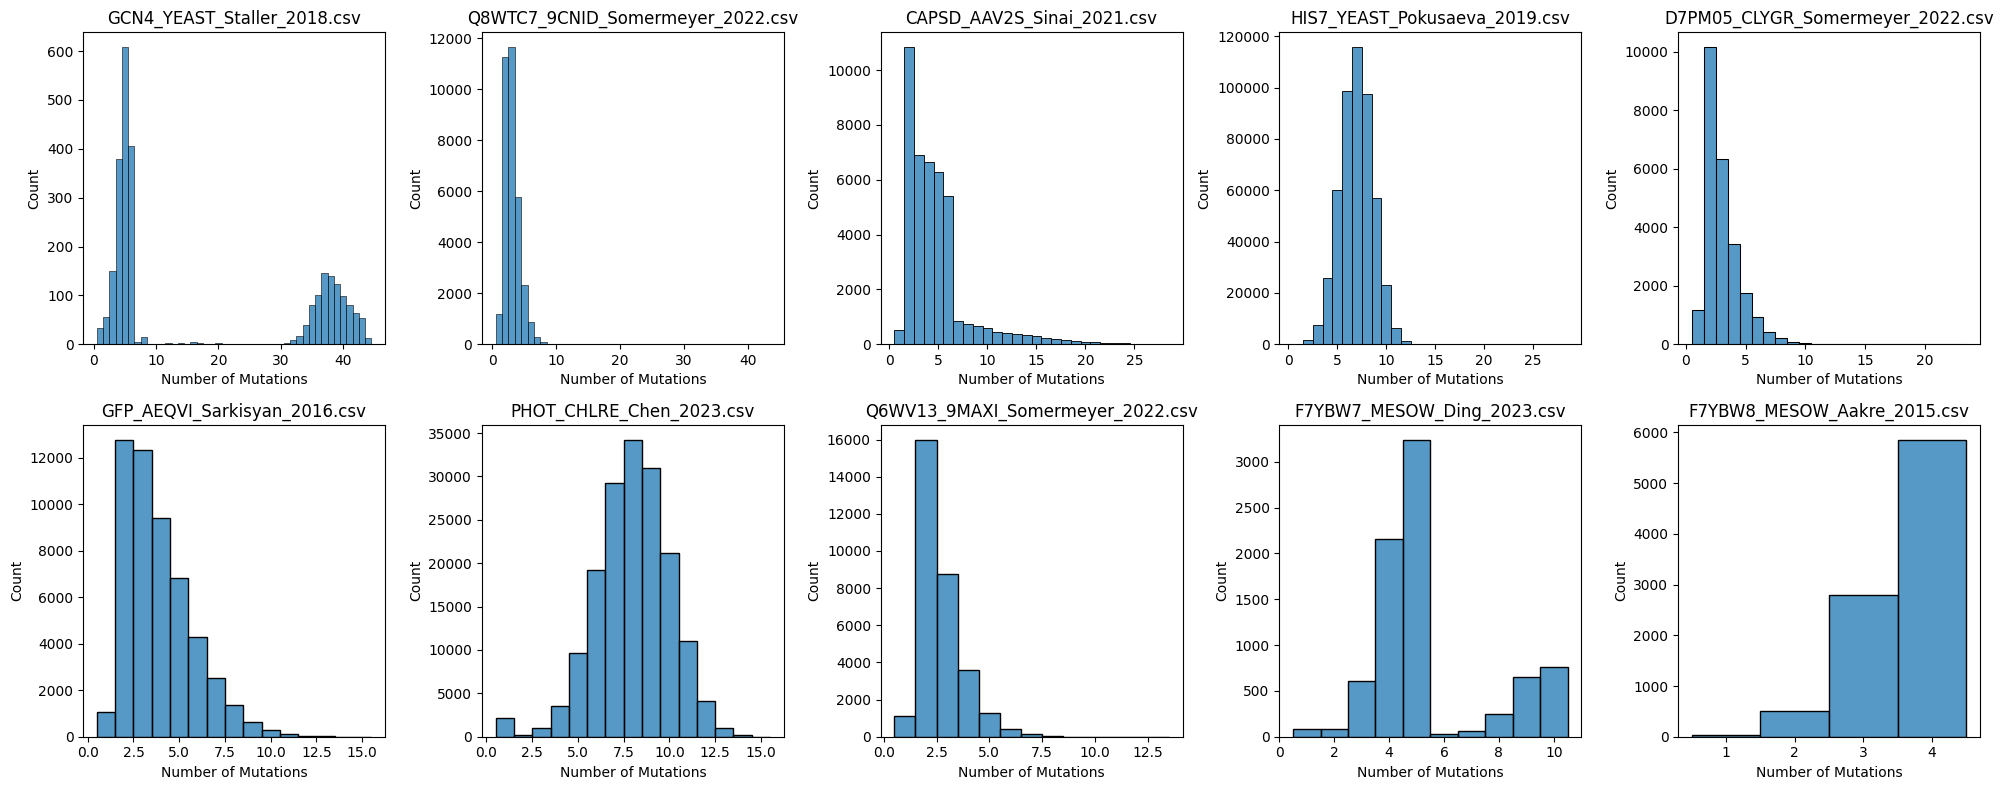

In [14]:
plt.figure(figsize=(20, 8))
for i, df in enumerate(top_10_df):
    plt.subplot(2, 5, i+1)
    sns.histplot(df['mutant'].str.count(':') + 1, discrete=True)
    plt.title(top_10.iloc[i]['DMS_filename'])
    plt.xlabel('Number of Mutations')
    plt.ylabel('Count')
plt.tight_layout()